In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Read the image
img = cv2.imread('C:\\Users\\jonat\\PycharmProjects\\Titanium_Find_Contour_U-Net\\data\\train\\P3MF16_N.png',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # color conversion from rgb to grayscale
_, width = gray.shape # '.shape' retrieve tuple which represent height and width. the underscore
                      # "_" is used to discard the height information
plt.axis('off') # hide the axis of the plot
plt.imshow(img)
plt.show()
# we need the two last lines of code because 'plt.imshow(img)' is like prepare the content that we want to display
# and 'plt.show()' is to actually display this content

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
# # Remove bottom bar
# img = img[0:width, 0:width]
# gray = gray[0:width, 0:width]
# plt.axis('off')
# plt.imshow(img)
# plt.show()

In [18]:
img.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = img 

# create a copy of the image for drawing points.
image_copy = image.copy()

# initialize variables to store points and drawing state
contour_points = []
drawing = False

# a function for mouse event.
def draw_contour(event, x, y, flags, param):
    global contour_points, drawing, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        contour_points = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        # increase the circle size to make the points more bold.
        cv2.circle(image_copy, (x, y), 10, (0, 255, 255), -1)
        contour_points.append((x, y))

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)  
cv2.setMouseCallback("Image", draw_contour)

while True:
    cv2.imshow("Image", image_copy)
    cv2.resizeWindow("Image", 750, 750)  # Set the window size to 10x10 inches
    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        break

cv2.destroyAllWindows()

# Create a mask with the contour
mask = np.zeros_like(image)
if len (contour_points) >= 2:
    points = np.array(contour_points, np.int32)
    cv2.fillPoly(mask, [points], (255, 255, 255))

# Save the image with contour
output_path = "C:\\Users\\jonat\\PycharmProjects\\Titanium_Find_Contour_U-Net\\external_contours_masks\\train\\P3MF16_N.png"
result_image = cv2.addWeighted(image, 1, mask, 0.5, 0)
cv2.imwrite(output_path, mask)

# subplot with two images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

# display only the mask on the right
axes[1].imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
axes[1].set_title("mask")
axes[1].axis("off")

plt.show()

print(f"Image with contour saved to {output_path}")


AttributeError: 'NoneType' object has no attribute 'copy'

number of pixels in the whole image with the background: 16777216
number of pixels in the mask: 4845905
ratio of pixels in the mask to pixels in the whole image: 0.2888


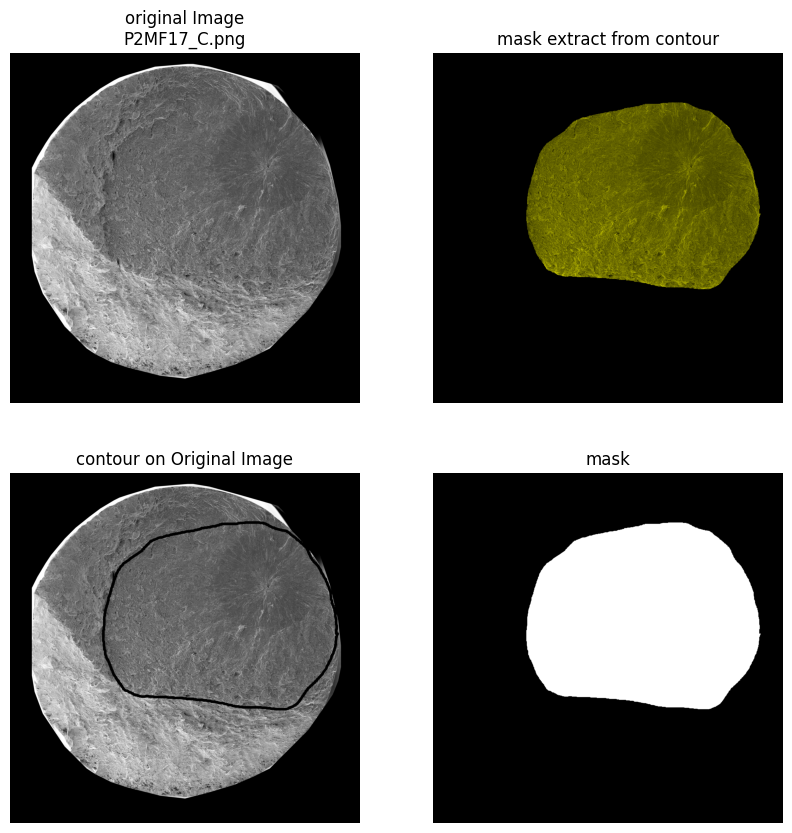

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image_path = "C:\\Users\\jonat\\PycharmProjects\\Titanium_Find_Contour_U-Net\\external_contours_masks\\results\\cropped\\P2MF17_C.png"
image = cv2.imread(image_path)

image_copy = image.copy()
contour_points = []
drawing = False

def draw_contour(event, x, y, flags, param):
    global contour_points, drawing, image_copy

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        contour_points = [(x, y)]
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        cv2.circle(image_copy, (x, y), 15, (0, 255, 255), -1)
        contour_points.append((x, y))

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Image", draw_contour)

while True:
    cv2.imshow("Image", image_copy)
    cv2.resizeWindow("Image", 750, 750)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("c"):
        break

cv2.destroyAllWindows()

# create a black background
mask = np.zeros_like(image)

# draw the filled contour in yellow on the black background
if len(contour_points) >= 2:
    points = np.array(contour_points, np.int32)
    cv2.drawContours(mask, [points], -1, (0, 255, 255), thickness=cv2.FILLED)

# save the yellow mask with black background
output_mask_path = "C:\\Users\\jonat\\PycharmProjects\\Titanium_Find_Contour_U-Net\\internal_bigger_masks\\test\\P2MF17_C.png"
cv2.imwrite(output_mask_path, mask)

# calculate the number of pixels in the whole image with the background
num_pixels_whole_image = np.prod(image.shape[:2])

# convert the multi-channel mask to a single-channel image (grayscale)
gray_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

# calculate the number of pixels in the drawn mask
num_pixels_mask = np.count_nonzero(gray_mask)

# calculate the ratio between the number of pixels in the mask and the number of pixels in the whole image
ratio_mask_to_whole_image = num_pixels_mask / num_pixels_whole_image if num_pixels_whole_image > 0 else 0.0

# display the heatmap with the drawn mask
heatmap_with_mask = cv2.bitwise_and(image, mask)

# create a (2,2) plot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# display the original image in the upper part
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title(f"original Image\n{os.path.basename(image_path)}")
axes[0, 0].axis("off")

# display the heatmap with the drawn mask in the upper right part
axes[0, 1].imshow(cv2.cvtColor(heatmap_with_mask, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title("mask extract from contour")
axes[0, 1].axis("off")

# display the contour on the original image in the lower left part
contour_image = image.copy()
cv2.drawContours(contour_image, [np.array(contour_points)], -1, (0, 0, 0), 30)
axes[1, 0].imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title("contour on Original Image")
axes[1, 0].axis("off")

# display the yellow mask with black background in the lower right part
axes[1, 1].imshow(gray_mask, cmap='gray')
axes[1, 1].set_title("mask")
axes[1, 1].axis("off")

print(f"number of pixels in the whole image with the background: {num_pixels_whole_image}")
print(f"number of pixels in the mask: {num_pixels_mask}")
print(f"ratio of pixels in the mask to pixels in the whole image: {ratio_mask_to_whole_image:.4f}")

plt.show()

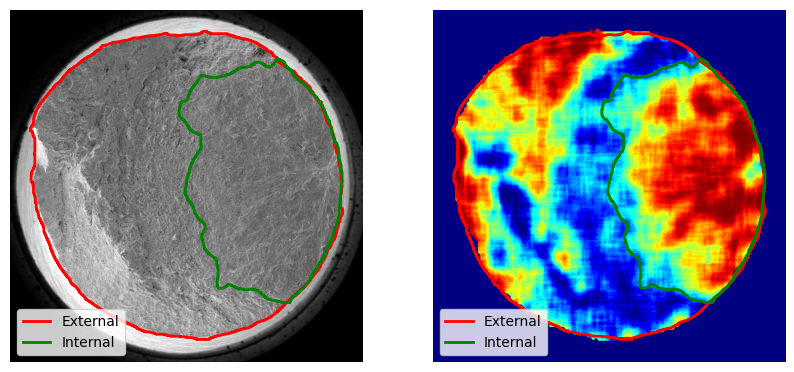

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_contour(event, x, y, flags, param):
    global drawing, contour_points, image_copy, contour_color, scale_factor
    x = int(x / scale_factor)
    y = int(y / scale_factor)

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        contour_points = [(x, y)]
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        # Scale x and y for drawing on the resized image
        cv2.circle(image_copy, (int(x * scale_factor), int(y * scale_factor)), 3, contour_color, -1)
        contour_points.append((x, y))
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        # Scale the points back to original image size before adding to contours
        contours.append(np.array(contour_points, dtype=np.int32))

def process_image(image_path, contour_type):
    global image_copy, contour_points, contours, contour_color, scale_factor
    image = cv2.imread(image_path)
    height, width = image.shape[:2]
    scale_factor = 750 / max(height, width)
    resized_image = cv2.resize(image, (0, 0), fx=scale_factor, fy=scale_factor)

    image_copy = resized_image.copy()
    contours = []
    contour_color = (255, 0, 0) if contour_type == 'internal' else (0, 0, 255)

    cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
    cv2.resizeWindow("Image", 750, 750)
    cv2.setMouseCallback("Image", draw_contour)

    while True:
        cv2.imshow("Image", image_copy)
        if cv2.waitKey(1) & 0xFF == ord('c'):  # Press 'c' to continue
            break

    cv2.destroyAllWindows()

    mask = np.zeros(image.shape, dtype=np.uint8)
    for contour in contours:
        # Scale contours back to original image size for accurate masking
        scaled_contour = np.array([[int(x), int(y)] for x, y in contour], dtype=np.int32)
        cv2.drawContours(mask, [scaled_contour], -1, contour_color, thickness=cv2.FILLED)

    masked_image = cv2.bitwise_and(image, mask)
    return image, mask, masked_image, contour

image_path1 = "C:\\Users\\jonat\\Downloads\\P1MF20_N_heatmap.png"  # Update this path
image_path2 = "C:\\Users\\jonat\\Downloads\\P1MF20_N_original.png"  # Update this path

# Process each image for internal and external contours respectively
image1, mask1, masked_image1, int_contour = process_image(image_path1, 'internal')
image2, mask2, masked_image2, ext_contour = process_image(image_path2, 'external')

# # Displaying results for both images
# fig, axs = plt.subplots(2, 3, figsize=(15, 10))
# 
# axs[0, 0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
# axs[0, 0].set_title('Original Image 1')
# axs[0, 0].axis('off')
# 
# axs[0, 1].imshow(cv2.cvtColor(mask1, cv2.COLOR_BGR2RGB))
# axs[0, 1].set_title('Internal Contour Mask')
# axs[0, 1].axis('off')
# 
# axs[0, 2].imshow(cv2.cvtColor(masked_image1, cv2.COLOR_BGR2RGB))
# axs[0, 2].set_title('Image 1 with Internal Contour')
# axs[0, 2].axis('off')
# 
# axs[1, 0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
# axs[1, 0].set_title('Original Image 2')
# axs[1, 0].axis('off')
# 
# axs[1, 1].imshow(cv2.cvtColor(mask2, cv2.COLOR_BGR2RGB))
# axs[1, 1].set_title('External Contour Mask')
# axs[1, 1].axis('off')
# 
# axs[1, 2].imshow(cv2.cvtColor(masked_image2, cv2.COLOR_BGR2RGB))
# axs[1, 2].set_title('Image 2 with External Contour')
# axs[1, 2].axis('off')
# 
# plt.tight_layout()
# plt.show()


# draw on the original image the internal and external contours
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
original_img_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
x_ext, y_ext = zip(*ext_contour)
x_int, y_int = zip(*int_contour)
axs[0].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
axs[0].plot(x_ext, y_ext, linewidth=2, color='red', label='External')
axs[0].plot(x_int, y_int, linewidth=2, color='green', label='Internal')
axs[0].legend(loc='lower left')
heatmap_img_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
axs[1].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
axs[1].plot(x_ext, y_ext, linewidth=2, color='red', label='External')
axs[1].plot(x_int, y_int, linewidth=2, color='green', label='Internal')
# put the legend on the left bottom side
axs[1].legend(loc='lower left')
for ax in axs:
    ax.axis('off')
plt.show()

In [ ]:
import cv2
import os
import numpy as np
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

def read_image(image_path):
    # using pillow to read the image
    im = Image.open(image_path)
    im.save(image_path[:-4] + 'png')
    img = cv2.imread(image_path[:-4] + 'png', cv2.IMREAD_COLOR)
    return img

# crop metadata
def crop_metadata(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, width = gray.shape
    img = img[0:width, 0:width]
    return img

def get_contour(mask: np.ndarray):
    # Apply thresholding
    ret, thresh = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    # Find contour using the eroded image
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Find the contour with the largest area
    contour = max(contours, key=cv2.contourArea)
    return contour


def predict_mask(img, model):
    # Predict the mask
    img = cv2.resize(img, (128, 128))
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=-1)
    img = img / 255
    pred = model.predict(img)
    pred = tf.argmax(pred, axis=-1)
    pred = pred[..., tf.newaxis]
    pred = tf.squeeze(pred)
    pred = pred.numpy()
    pred = pred.astype(np.uint8) * 255
    return pred


def predict_ext_mask(img, model):
    img = cv2.resize(img, (4096, 4096))
    # Convert the image to float32 and resize it to the target size (128, 128)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Ensure img is in RGB if it's not
    img = cv2.resize(img, (128, 128)).astype(np.float32)

    # Prepare the image for edge detection by adding a batch dimension
    img_batch = tf.expand_dims(img, axis=0)

    # Perform edge detection along both X and Y directions
    sobel_x = tf.image.sobel_edges(img_batch)[..., 0]
    sobel_y = tf.image.sobel_edges(img_batch)[..., 1]
    input_edge = tf.reduce_sum(tf.abs(sobel_x) + tf.abs(sobel_y), axis=-1)
    input_edge = tf.squeeze(input_edge, axis=0)

    # Expand the edge data to match the image channel for blending
    input_edge_expanded = tf.expand_dims(input_edge, -1)

    # Blend the edge information into the original image
    img_with_edges = (img + input_edge_expanded) / 2

    img_with_edges = img_with_edges / 255.0

    # Ensure the processed image has the batch dimension for model prediction
    img_with_edges = tf.expand_dims(img_with_edges, axis=0)

    # Predict the mask using the model
    pred = model.predict(img_with_edges)
    pred = tf.argmax(pred, axis=-1)
    pred = pred[..., tf.newaxis]
    pred = tf.squeeze(pred)
    pred = pred.numpy()
    pred = pred.astype(np.uint8) * 255  # Convert the prediction to uint8 if the mask is a binary mask

    return pred


def get_heatmap(img, contour):
    img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # create a mask with the contour
    mask = np.zeros(img_grey.shape, np.uint8)
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1, cv2.LINE_AA)
    #######################
    out = np.zeros_like(img)
    out[mask == 255] = img[mask == 255]
    img_color = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    ######################
    img_grey = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img_grey, (13, 13), 0)
    #edges = cv2.Canny(blur, 50, 150)
    # Run Sobel filter on the original image
    sobelx = cv2.Sobel(blur, cv2.CV_8U, 1, 0, ksize=5)
    sobely = cv2.Sobel(blur, cv2.CV_8U, 0, 1, ksize=5)
    # Find the magnitude of the gradient
    sobel_magnitude = np.sqrt(sobelx ** 2 + sobely ** 2)
    # Normalize the image
    sobel_magnitude = sobel_magnitude / sobel_magnitude.max() * 255
    # Convert to uint8
    sobel_magnitude = np.uint8(sobel_magnitude)

    window_size = 201  # Odd number only
    window_step = 10

    heat_map_sobel = np.zeros(sobel_magnitude.shape, dtype=np.uint8)

    # pad the images with zeros
    sobel_c = np.pad(sobel_magnitude, int((window_size - 1) / 2), mode='constant', constant_values=0)
    mask_metal_c = np.pad(mask, int((window_size - 1) / 2), mode='constant', constant_values=0)

    for y in range(0, sobel_c.shape[0], window_step):
        for x in range(0, sobel_c.shape[1], window_step):
            window = sobel_c[y:y + window_size, x:x + window_size]
            mask_metal_window = mask_metal_c[y:y + window_size, x:x + window_size] / 255
            if mask_metal_window.sum() == 0 or mask_metal_window[
                (int((window_size - 1) / 2)), (int((window_size - 1) / 2))] == 0:
                heat_map_sobel[y:y + window_size, x:x + window_size] = 0
            else:
                heat_map_sobel[y:y + window_step, x:x + window_step] = np.sum(window) / mask_metal_window.sum()

    heat_map_sobel = cv2.equalizeHist(heat_map_sobel)

    # # apply a threshold to remove low-intensity values
    # threshold = 50
    # heat_map_sobel[heat_map_sobel < threshold] = 0

    # Save the image with color map
    heat_map_sobel_tmp = heat_map_sobel.copy()
    heat_map_color_sobel = cv2.applyColorMap(heat_map_sobel_tmp, cv2.COLORMAP_JET)
    heat_map_color_sobel_rgb = cv2.applyColorMap(heat_map_color_sobel, cv2.COLOR_BGR2RGB)
    return heat_map_color_sobel


def crop_image(img, contour):
    # Create a mask with the contour
    mask = np.zeros(img.shape, np.uint8)
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1, cv2.LINE_AA)
    # Apply the mask to the image
    img = cv2.bitwise_and(img, mask)
    return img
    
image_path = "C:\\Users\\jonat\\Downloads\\SLM-TI-6AL-4V-streo-20240719T152858Z-001\\all lights - 1.25_24-02-01 1151.tiff"
img = read_image(image_path)

# # Crop the metadata
img = crop_metadata(img)

cv2.imwrite(image_path[:-4] + 'png', img)

# Load the model
model = tf.keras.models.load_model("C:\\Users\\jonat\\PycharmProjects\\Titanium_Find_Contour_U-Net\\external_mask_unet_model")

# Predict the mask
ext_mask = predict_mask(img, model)
 
# Get the contour
ext_contour = get_contour(ext_mask)

ext_contour = ext_contour * (img.shape[0] / 128)
ext_contour = ext_contour.astype(np.int32)
cropped_img = crop_image(img, ext_contour)

# Get the heatmap
heatmap = get_heatmap(cropped_img, ext_contour)

# save the heatmap
cv2.imwrite(image_path[:-5] + '_heatmap.png', heatmap)

1/1 [==============================] - 1s 808ms/step
